In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt

Reading in the data

In [3]:
customers_pca = pd.read_csv("data/data_after_pca.csv", index_col="user_id")
customers_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
user_id,,,,,,,,,,,,
23557,-1.269247,-0.905566,1.473063,-1.672125,0.154529,0.245905,1.137669,-0.695718,1.437877,0.780581,0.583593,-0.215794
94883,-0.745703,-0.934812,1.086287,-0.457635,0.147232,0.102647,1.019407,-0.755487,-0.512418,-0.123690,-0.372088,-0.177209
101486,-0.974684,-0.401329,1.548112,-0.637913,-0.309421,-0.288063,-0.595990,-0.254237,1.243292,-0.710989,0.086492,-0.229272
101961,1.827152,-1.034987,-0.067035,-1.351087,-0.004430,-0.107465,0.462235,-0.637749,-0.175271,-0.523401,-1.071663,-0.664052
106907,0.335033,3.718160,3.553328,2.167956,-2.196309,-0.809532,-2.548858,-2.979532,-4.525340,4.567391,0.503213,-0.409658
...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.686769,-0.639507,-0.902803,-0.634124,0.197014,-0.201255,0.654981,-0.602688,-1.069467,-0.822394,0.531115,-0.462916
796032,0.434724,1.109376,1.197485,0.165461,-0.386844,2.527146,0.109959,-0.650615,-0.727093,0.930841,-0.248784,0.194578
801660,0.021510,-0.685279,1.339123,-0.864917,-0.684170,2.194975,-1.216874,0.306593,-0.098875,-0.989041,0.146589,-0.575768


Applying K-means and finding an optimal number of clusters using elbow method:

In [8]:
scores = []
k_range = range(2,20)
for n_clusters in k_range:
  kmeans = KMeans(n_clusters=n_clusters)
  groups = kmeans.fit_predict(customers_pca)
  scores.append(kmeans.inertia_)

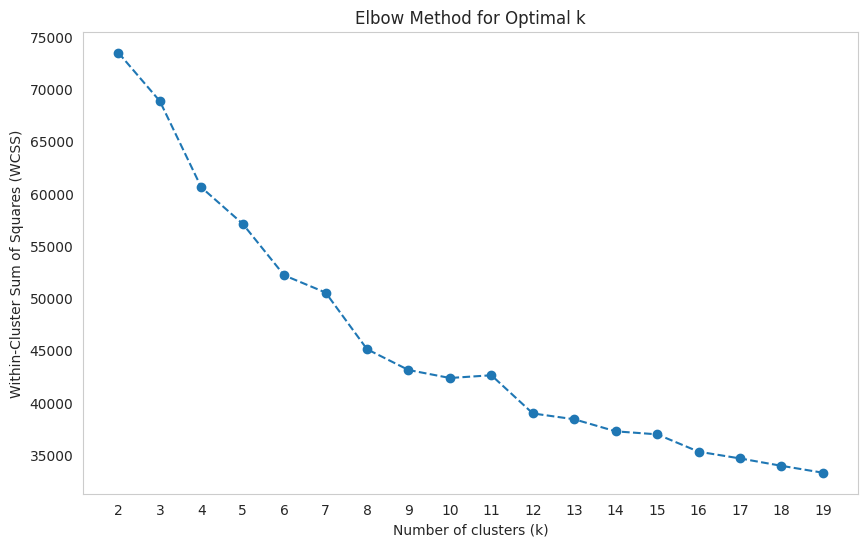

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid()
plt.show()

It means that 6 is an optimal number for clusters based on elbow plot

In [10]:
kmeans = KMeans(n_clusters=6)
groups = kmeans.fit_predict(customers_pca)
groups

array([1, 1, 1, ..., 5, 1, 0], dtype=int32)

In [11]:
groups = pd.DataFrame(groups)
groups.index = customers_pca.index
groups.columns = ["group"]
groups

,group
user_id,
23557,1
94883,1
101486,1
101961,5
106907,2
...,...
792549,3
796032,5
801660,5


Let's count the number of customers in each group:

In [12]:
groups.value_counts()

group
3        1687
5        1259
1        1012
0        1004
4         590
2         446
Name: count, dtype: int64

Adding the cluster number to the data as a column

In [14]:
customers_viz = pd.concat([customers_pca,groups],axis=1)
customers_viz

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,group
user_id,,,,,,,,,,,,,
23557,-1.269247,-0.905566,1.473063,-1.672125,0.154529,0.245905,1.137669,-0.695718,1.437877,0.780581,0.583593,-0.215794,1
94883,-0.745703,-0.934812,1.086287,-0.457635,0.147232,0.102647,1.019407,-0.755487,-0.512418,-0.123690,-0.372088,-0.177209,1
101486,-0.974684,-0.401329,1.548112,-0.637913,-0.309421,-0.288063,-0.595990,-0.254237,1.243292,-0.710989,0.086492,-0.229272,1
101961,1.827152,-1.034987,-0.067035,-1.351087,-0.004430,-0.107465,0.462235,-0.637749,-0.175271,-0.523401,-1.071663,-0.664052,5
106907,0.335033,3.718160,3.553328,2.167956,-2.196309,-0.809532,-2.548858,-2.979532,-4.525340,4.567391,0.503213,-0.409658,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.686769,-0.639507,-0.902803,-0.634124,0.197014,-0.201255,0.654981,-0.602688,-1.069467,-0.822394,0.531115,-0.462916,3
796032,0.434724,1.109376,1.197485,0.165461,-0.386844,2.527146,0.109959,-0.650615,-0.727093,0.930841,-0.248784,0.194578,5
801660,0.021510,-0.685279,1.339123,-0.864917,-0.684170,2.194975,-1.216874,0.306593,-0.098875,-0.989041,0.146589,-0.575768,5


Visualizing clusters using just the first 2 compontents

<Axes: xlabel='pca_0', ylabel='pca_1'>

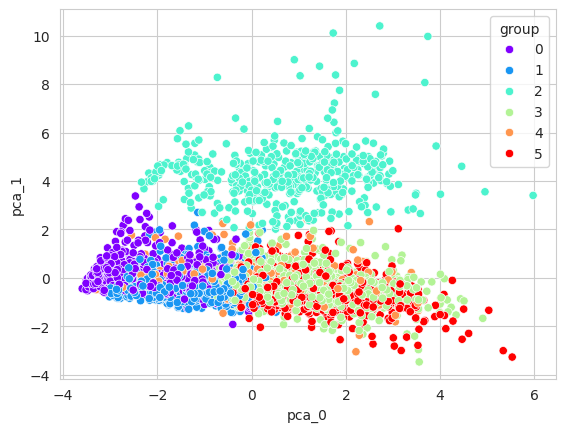

In [15]:
sns.scatterplot(data=customers_viz,x="pca_0",y="pca_1",hue="group",palette="rainbow",legend='full')

Reading in the original dataset and assigning the segment number to each user id:

In [24]:
customers = pd.read_csv("data/customers.csv",index_col="user_id")
customers["group_k_means"] = groups
# drop columns
customers.drop(['home_airport', 'home_city', 'home_country'], axis=1, inplace=True)
customers.gender = customers['gender'].map({'F': 0, 'M': 1, 'O': 2})

customers

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown,group_k_means
user_id,,,,,,,,,,,,,,
23557,82,8,76.625000,0.000000,66,0,True,False,2,0,3670.5,0.00,0.000000,1
94883,73,8,67.750000,0.500000,52,0,True,False,2,4,130.0,6.50,1451.335404,1
101486,131,8,122.250000,0.000000,52,0,True,True,2,2,2199.0,9.00,995.681600,1
101961,126,8,117.750000,0.400000,44,0,True,False,5,10,2429.0,5.60,1366.569097,5
106907,240,8,758.915066,5.000000,46,0,True,True,0,0,0.0,0.00,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,114,8,106.875000,0.500000,47,0,False,False,4,8,144.0,4.75,1459.165621,3
796032,148,8,545.319542,1.250000,52,0,True,False,2,4,1261.0,7.00,1876.245079,5
801660,115,8,106.000000,0.333333,55,0,True,True,3,6,872.0,6.00,710.553530,5


In [26]:
customers.mean()

num_clicks               144.308436
num_sessions               8.204568
avg_session_duration     187.060316
avg_bags                   0.518031
age                       42.473825
gender                     0.119540
married                    0.440480
has_children               0.326442
num_trips                  2.582361
num_flights                4.291097
money_spent_hotel       1757.946315
time_after_booking        10.461487
avg_km_flown            1874.112150
group_k_means              2.604201
dtype: float64

In [25]:
customers.groupby('group_k_means').mean()


,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
group_k_means,,,,,,,,,,,,,
0,105.660359,8.157371,109.861398,0.244522,28.194223,0.038845,0.040837,0.324701,1.049801,1.305777,913.984612,6.331673,921.197710
1,108.494071,8.254941,104.197022,0.356308,52.975296,0.009881,0.908103,0.433794,1.341897,1.932806,849.964872,5.334980,1407.131984
2,344.645740,8.269058,986.673911,0.755814,42.208520,0.154709,0.399103,0.329596,1.977578,3.300448,1279.648767,7.178059,1694.890121
3,142.261411,8.201541,132.158337,0.599787,41.139301,0.000000,0.000000,0.228216,3.573207,6.221695,2299.725637,13.058420,2326.719571
4,131.613559,8.096610,128.330291,0.540771,42.903390,1.015254,0.416949,0.359322,2.733898,4.594915,1840.071780,10.491344,2054.182553
5,141.639396,8.233519,133.055596,0.661700,47.100874,0.000000,0.999206,0.356632,3.617156,6.189039,2565.809492,15.544985,2382.017469


Exploring the clusters based on different traits:

In [27]:
customers.loc[customers["num_trips"]==0,"group_k_means"].value_counts()

group_k_means
0    291
1    177
2     64
4     24
Name: count, dtype: int64

In [19]:
pd.crosstab(customers["group_k_means"],customers["gender"])

gender,F,M,O
group_k_means,,,
0,967,35,2
1,1002,10,0
2,377,69,0
3,1687,0,0
4,0,581,9
5,1259,0,0


In [15]:
pd.crosstab(customers["group_k_means"],[customers["gender"],customers["has_children"]])

gender            F           M           O      
has_children  False True  False True  False True 
group_k_means                                    
0                60    37     5     4     0     0
1                 0   967     0   119     0     4
2               348   122    31    16     0     1
3               249   118    50    23     0     0
4               812     0    84     0     1     0
5               131   178    33    35     0     0
6               557   226    75    40     1     2
7              1072    12   158     2     2     0
8               353    50    18     2     0     0

In [16]:
pd.crosstab(customers["group_k_means"],[customers["gender"],customers["has_children"],customers["home_country"]])

gender             F                        M                      O      
has_children   False        True        False       True       False True 
home_country  canada   usa canada  usa canada  usa canada  usa   usa   usa
group_k_means                                                             
0                 17    43      7   30      1    4      0    4     0     0
1                  0     0      0  967      0    0      0  119     0     4
2                 28   320      2  120      1   30      0   16     0     1
3                 37   212     20   98     11   39      3   20     0     0
4                  0   812      0    0      0   84      0    0     1     0
5                131     0    178    0     33    0     35    0     0     0
6                 53   504     16  210      9   66      2   38     1     2
7                  0  1072      0   12      0  158      0    2     2     0
8                353     0     50    0     18    0      2    0     0     0

The below plot summarizes features for each cluster. Note it may take quite a while for it to be built

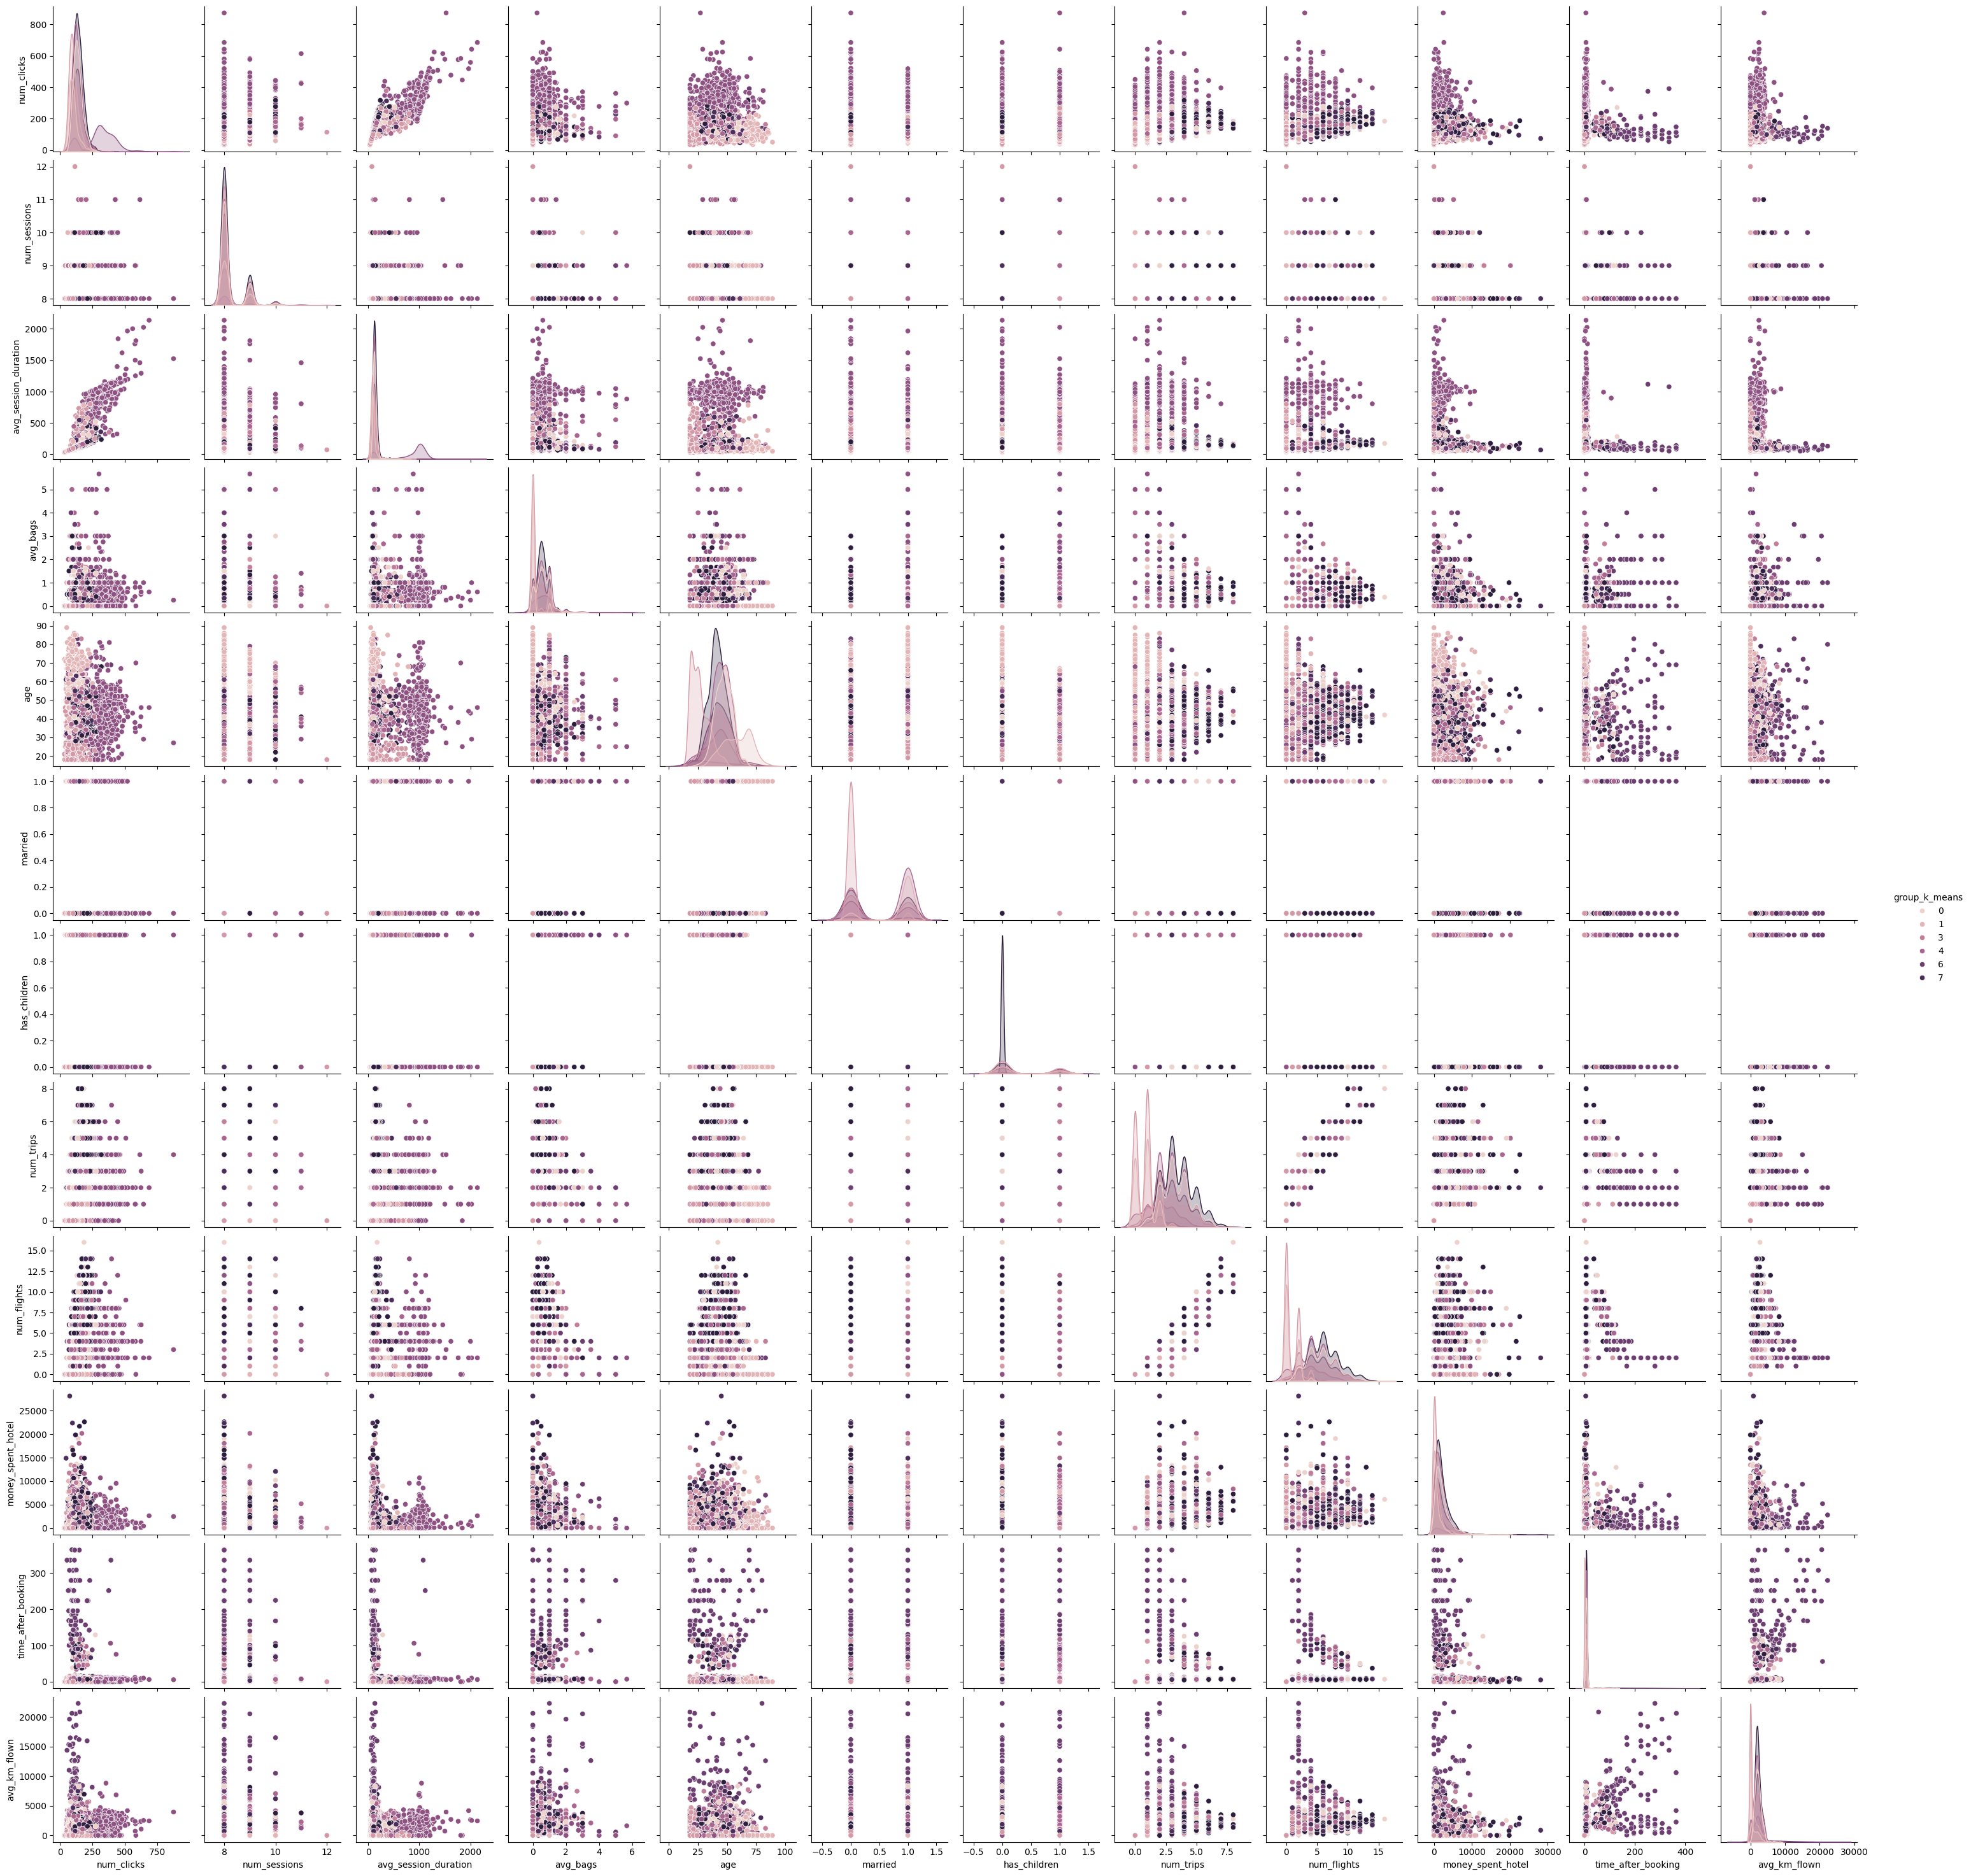

In [62]:
sns.pairplot(customers,hue="group_k_means")

Now, DBSCAN.
The first step is to find out the `ε` value to be set:

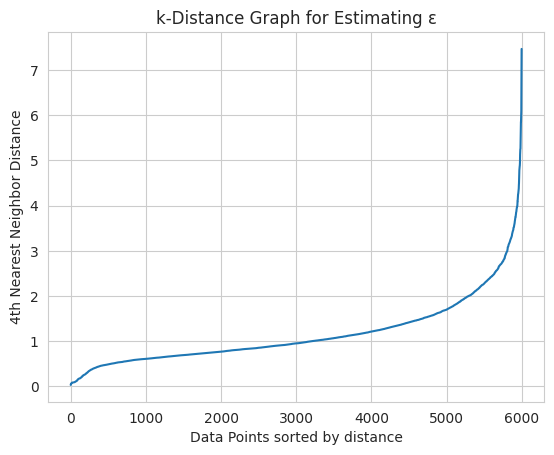

In [17]:
# Use NearestNeighbors to compute the k-distance
neighbors = NearestNeighbors(n_neighbors=5)  # We use 5 because MinPts is usually set to 4 or 5
neighbors_fit = neighbors.fit(customers_pca)
distances, indices = neighbors_fit.kneighbors(customers_pca)

# Sort the distances to plot them
distances = np.sort(distances[:, 4], axis=0)  # 4th index because of n_neighbors=5

# Plot the k-distance graph
plt.plot(distances)
plt.title("k-Distance Graph for Estimating ε")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

It seems like `ε` should be set to 2.
`min_samples`, in this case, should be set to 2 * 2 = 4

In [19]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
groups_dbscan = dbscan.fit_predict(customers_pca)
groups_dbscan

array([-1, -1, -1, ..., -1, -1, -1])

Now, let's see what we got using the same approach as with K-means

In [20]:
groups_dbscan = pd.DataFrame(groups_dbscan)
groups_dbscan.index = customers_pca.index
groups_dbscan.columns = ["group"]
groups_dbscan

,group
user_id,
23557,-1
94883,-1
101486,-1
101961,-1
106907,-1
...,...
792549,-1
796032,-1
801660,-1


In [22]:
groups_dbscan.value_counts()

group
-1       5429
 0        111
 1         43
 14        33
 16        29
 24        24
 13        19
 4         16
 8         14
 20        14
 30        13
 23        12
 7         11
 19        11
 22        11
 10        10
 11         8
 48         8
 38         8
 45         7
 36         6
 28         6
 32         6
 9          6
 5          6
 26         6
 51         6
 31         5
 21         5
 12         5
 3          5
 18         5
 15         5
 17         4
 6          4
 2          4
 29         4
 35         4
 27         4
 25         4
 33         4
 39         4
 37         4
 34         4
 40         4
 46         4
 44         4
 42         4
 41         4
 52         4
 47         4
 49         4
 50         4
 54         4
 53         4
 55         4
 43         3
Name: count, dtype: int64

The number of clusters turned out to be the same as with K-means! Let's add the clusters identified by DBSCAN to the original table with the customers data

In [67]:
customers["group_dbscan"] = groups_dbscan
customers

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,home_city,home_airport,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown,group_k_means,group_dbscan
user_id,,,,,,,,,,,,,,,,,,
23557,82,8,76.625000,0.000000,66,F,True,False,usa,new york,LGA,2,0,3670.5,0.00,0.000000,1,0
94883,73,8,67.750000,0.500000,52,F,True,False,usa,kansas city,MCI,2,4,130.0,6.50,1451.335404,0,3
101486,131,8,122.250000,0.000000,52,F,True,True,usa,tacoma,TCM,2,2,2199.0,9.00,995.681600,4,1
101961,126,8,117.750000,0.400000,44,F,True,False,usa,boston,BOS,5,10,2429.0,5.60,1366.569097,0,5
106907,240,8,758.915066,5.000000,46,F,True,True,usa,miami,TNT,0,0,0.0,0.00,0.000000,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,114,8,106.875000,0.500000,47,F,False,False,usa,kansas city,MCI,4,8,144.0,4.75,1459.165621,8,3
796032,148,8,545.319542,1.250000,52,F,True,False,canada,winnipeg,YAV,2,4,1261.0,7.00,1876.245079,7,2
801660,115,8,106.000000,0.333333,55,F,True,True,canada,toronto,YKZ,3,6,872.0,6.00,710.553530,7,2


As for the next steps: although the number of clusters stay the same between two also, the numbers that are assigned to each cluster might be different between k-means and DBSCAN. It s worth exploring how to connect the cluster numbers between outputted by two algorityhms and check how they intersect!